<a href="https://colab.research.google.com/github/higebobo/my-colab/blob/main/fisco_stock_info.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 出来た株・動いた株

* [出来た株・動いた株](https://market.fisco.co.jp/update/analysis/kabu.jsp)
* [【Python】Google ColaboratoryでSelenium実行｜ゆゆうブログ](https://yuyuublog.com/colaboratoryselenium/)

## Text version

### Install

In [23]:
!apt-get update
!apt install chromium-chromedriver
!pip install pip --upgrade
!pip install selenium

Hit:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Hit:2 http://security.ubuntu.com/ubuntu bionic-security InRelease
Ign:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:5 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Hit:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:7 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:8 http://archive.ubuntu.com/ubuntu bionic-updates InRelease
Hit:9 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:10 http://archive.ubuntu.com/ubuntu bionic-backports InRelease
Hit:12 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Hit:13 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Reading package lists... Done
Reading package lists... Done
Building dependency t

### Import

In [24]:
import re

from IPython.display import HTML, display
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from selenium.webdriver.common.desired_capabilities import DesiredCapabilities

### Define variables

In [25]:
wait = 1
url = 'https://market.fisco.co.jp/update/analysis/kabu.jsp'

pattern = '\*(.+)<(\d+)>\s(\d+)\s(.+\d+)\n(.+)'
rc = re.compile(pattern, re.MULTILINE | re.DOTALL)

# yahoo finance
stock_base_url = 'https://finance.yahoo.co.jp/quote/'

### Initialize

In [26]:
options = webdriver.ChromeOptions()
options.desired_capabilities = DesiredCapabilities.CHROME
options.add_argument('--headless')
options.add_argument('--no-sandbox')
options.add_argument('--disable-dev-shm-usage')
service = Service(executable_path='/usr/lib/chromium-browser/chromedriver')
driver = webdriver.Chrome(service=service, options=options)
driver.implicitly_wait(wait)

### Get data

In [27]:
driver.get(url)

elem = driver.find_element(By.ID, 'ugodeki_uptime')
date_text = elem.text

elem = driver.find_element(By.ID, 'ugodeki')

word_list = re.findall(pattern, elem.text)

### Add information and sort

In [28]:
word_list_updated = list()

for x in word_list:
    if x[3].startswith('+'):
        color = '#090'
        ratio = float(x[3]) / (float(x[2]) - float(x[3])) * 100
    elif x[3].startswith('-'):
        color = '#900'
        ratio = float(x[3]) / (float(x[2]) - float(x[3])) * 100
    else:
        color = '#000'
        ratio = 0
    word_list_updated.append(x + (color, ratio))

word_list_updated.sort(key=lambda x: x[6], reverse=True)

### Output

In [29]:
output = '<h1>(フィスコ)出来た株・動いた株</h1>'
output += f'<h2>{date_text}</h2>'

output += '''
<table>
  <thead>
    <tr>
      <th>コード</th>
      <th>銘柄</th>
      <th>株価</th>
      <th colspan="2">変動価格</th>
      <th>コメント</th>
    </tr>
  </thead>
  <tfoot></tfoot>
  <tbody>
'''

for x in word_list_updated:
    output += f'''
        <tr>
          <td><a href="{stock_base_url}{x[1]}.T" target="_blank">{x[1]}</a></td>
          <td>{x[0]}</td>
          <td style="text-align: right;">{int(x[2]):,}円</td>
          <td style="color: {x[5]}; text-align: right">{x[3]}円</td>
          <td style="color: {x[5]}; text-align: right">{x[6]:1.2f}%</td>
          <td>{x[4]}</td>
        </tr>
    '''

output += '''
  </tbody>
</table>
'''
display(HTML(output))

## Chart version

### Install section

In [30]:
!pip install mplfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### Import section

In [31]:
import base64
import datetime
from io import BytesIO

import mplfinance as mpf
import pandas_datareader.data as pdr
import requests

### Basic settings

In [32]:
# User Agent
user_agent = {
    'User-Agent': 'Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:89.0) Gecko/20100101 Firefox/89.0',
    'Accept': 'application/json;charset=utf-8'
}

session = requests.Session()
session.headers.update(user_agent)

# Interval
end = datetime.date.today()
start = end - datetime.timedelta(weeks=13) # 3 month

### Output

**NOTE: It takes about 30 seconds**

**注意: 処理時間が30秒近くかかる**

銘柄情報,チャート
2195 アミタＨＤ 1548円 +271円(21.22%) トークンエコノミーを設計・開発する子会社設立へ。,
7501 ティムコ 919円 +147円(19.04%) 22年11月期の利益予想上方修正。,
4937 Ｗａｑｏｏ 1421円 +226円(18.91%) 医薬品や再生医療等製品の設計・開発などを事業目的に追加。,
7298 八千代工業 951円 +150円(18.73%) 業績上振れをあらためて評価の格好にも。,
3687 フィックスターズ 1322円 +191円(16.89%) 量子コンピューター関連として関心が向かう。,
7184 富山第一銀行 580円 +76円(15.08%) 井村俊哉氏の大株主浮上を引き続き材料視。,
6838 多摩川ＨＤ 870円 +88円(11.25%) 量子センサーへの展開力など材料視。,
4575 キャンバス 1109円 +109円(10.90%) 前週からの強い値動きが続く。,
4720 城南進研 440円 +40円(10.00%) 学研HDと資本業務提携へ。,
6245 ヒラノテク 2227円 +195円(9.60%) EV関連として先週後半から人気化する形に。,

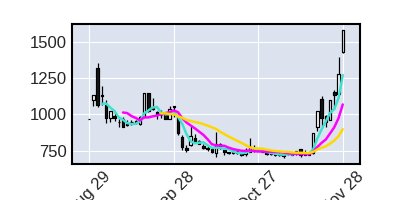
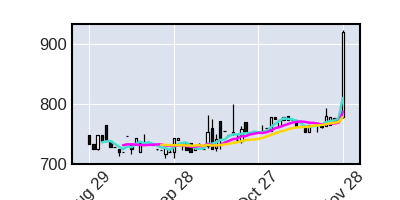
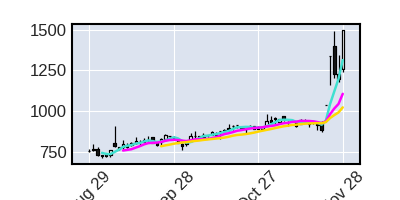
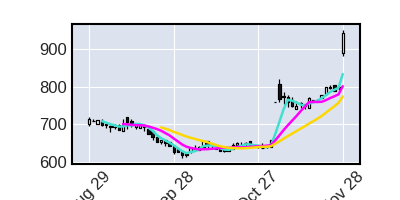
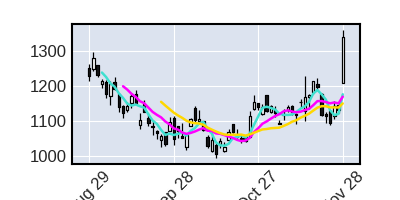
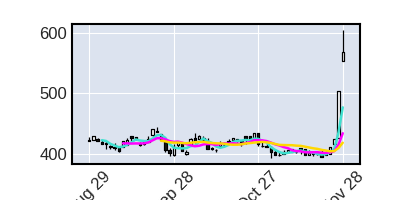
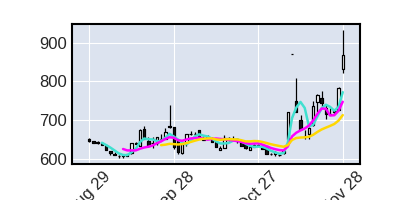
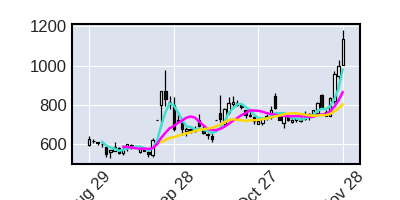
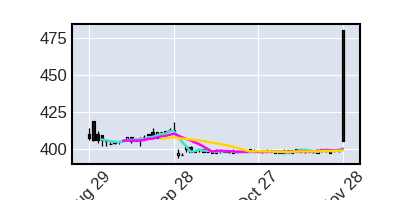
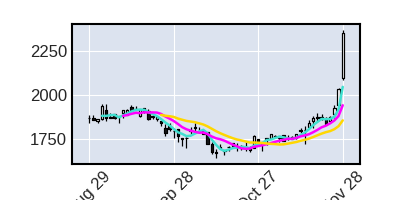
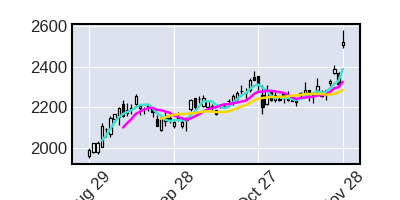
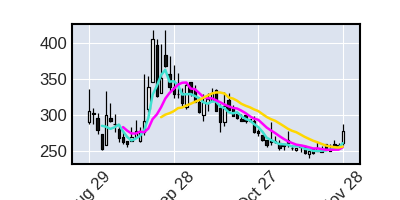
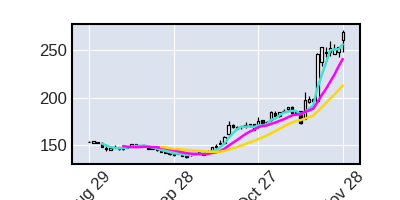
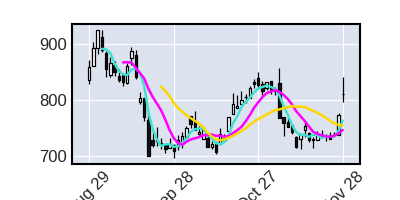
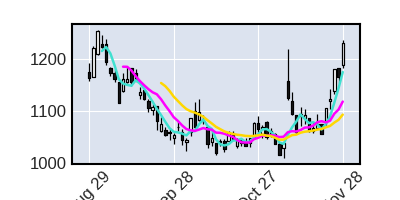
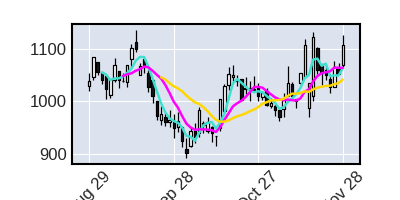
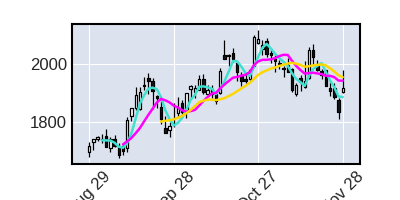
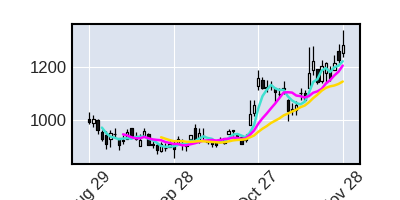
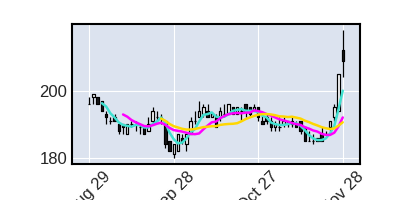
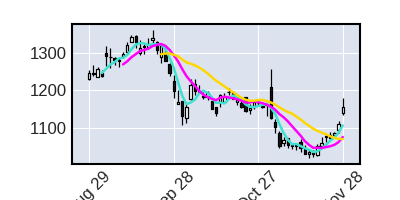
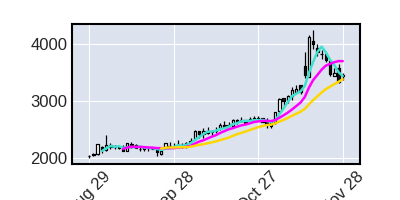
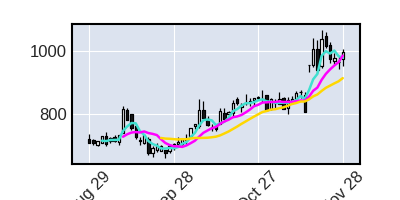
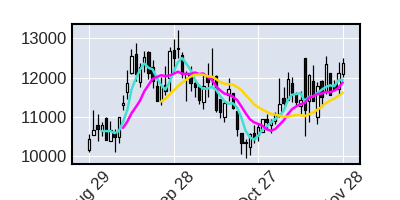
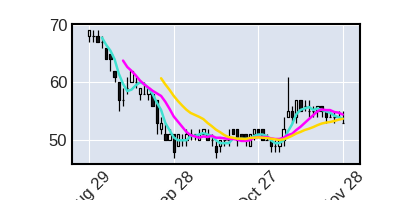
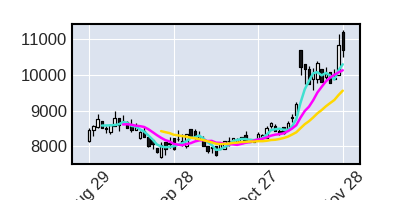
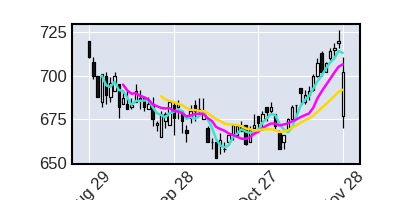
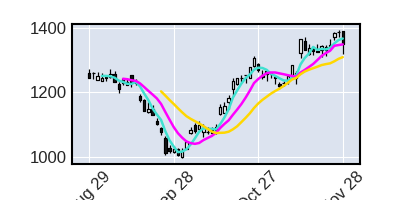
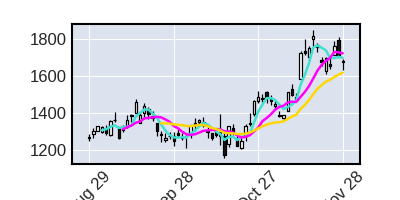
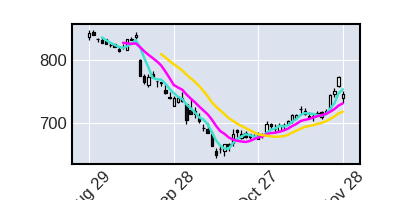
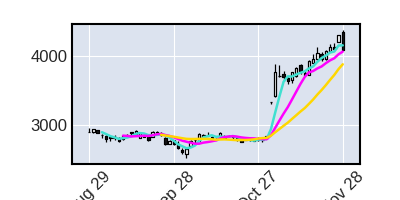
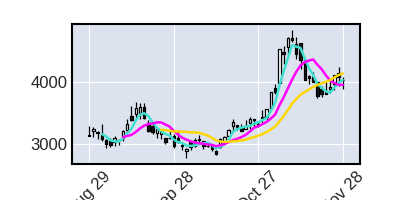
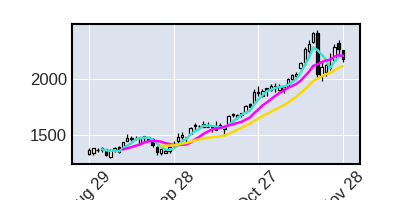
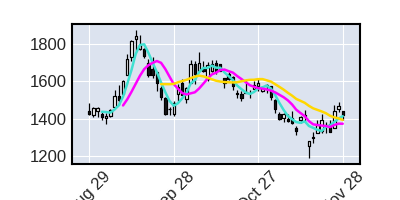
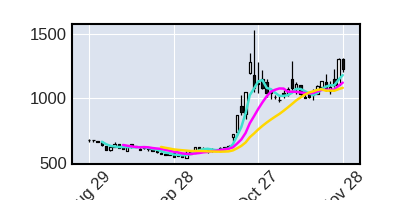
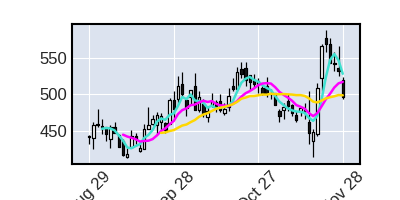
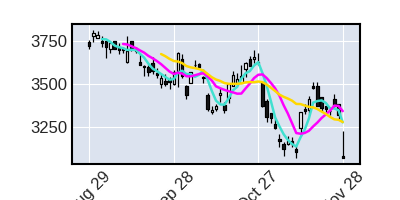
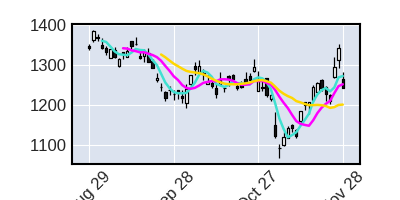
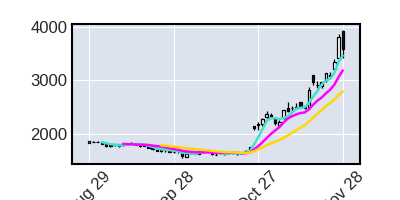
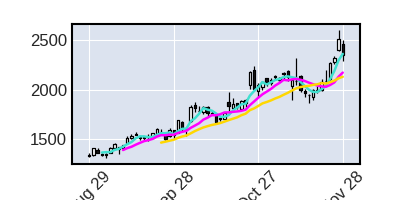
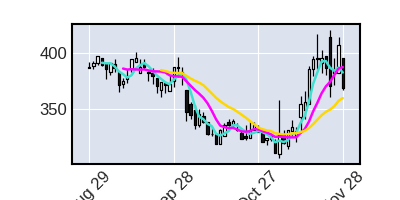
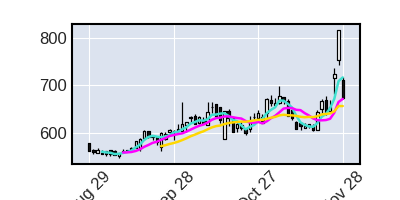

In [33]:
output = '<h1>(フィスコ)出来た株・動いた株</h1>'
output += f'<h2>{date_text}</h2>'

output += '''
<table>
  <thead>
    <tr>
      <th>銘柄情報</th>
      <th>チャート</th>
    </tr>
  </thead>
  <tfoot></tfoot>
  <tbody>
'''

for x in word_list_updated:
    symbol = f'{x[1]}.T'
    stock_url = f'{stock_base_url}{symbol}'
    chart_url = f'{stock_url}/chart'
    
    df = pdr.DataReader(symbol, 'yahoo', start, end, session=session)
    buffer = BytesIO()
    mpf.plot(df, type='candle', figsize=(4, 2), xlabel='', ylabel='', mav=(4, 9, 18), savefig=buffer)
    img = base64.b64encode(buffer.getvalue()).decode("ascii")

    output += f'''
        <tr>
          <td>
            <ul>
              <li><a href="{stock_url}" target="_blank">{x[1]}&nbsp;{x[0]}</a></li>
              <li>{x[2]}円&nbsp;<span style="color: {x[5]}">{x[3]}円({x[6]:1.2f}%)</span></li>
              <li>{x[4]}</li>
            </ul>            
          </td>
          <td><a href="{chart_url}" target="_blank"><img src="data:image/png;base64,{img}" /></a></td>
        </tr>
    '''
output += '''
  </tbody>
</table>
'''
display(HTML(output))